Diego García 22404 <br>
César López 22535 <br>

# Proyecto 2 - Hoja de Trabajo 6


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, root_mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

## Modelo de regresión usando KNN

Cargamos los datos tomando el precio de venta (SalePrice) como nuestra variable respuesta. También dividimos el dataset en 80% de entrenamiento y 20% de prueba. Esto para que la división sea igual a las anteriores.

In [3]:
train = pd.read_csv("train.csv")

X = train.drop(columns=["SalePrice"])
y = train["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 80)
(292, 80)
(1168,)
(292,)


Separamos las variables entre numéricas y categóricas. También reemplazamos los valores nulos para evitar errores. Los nulos de las variables numéricas se llenan con 0 y los de las variables categóricas con la leyenda 'Unavailable'.

In [4]:
categorical_columns_selector = selector(dtype_include=object)
numerical_columns_selector = selector(dtype_exclude=object)

numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

numerical_imputer = SimpleImputer(strategy='constant', fill_value=0)
categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unavailable')

print(categorical_columns)
print(numerical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

Normalizamos las variables y creamos el pipeline con KNN

In [5]:
categorical_preprocessor = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

numerical_preprocessor = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)
])

In [6]:
knn_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

Definimos los hiperparámetros para optimizar la búsqueda y hacemos un cross validation para encontrar los mejores hiperparámetros

In [7]:
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Diferentes valores de k
    'knn__weights': ['uniform', 'distance'],  # Peso de los vecinos
    'knn__p': [1, 2]  # Distancia Manhattan (p=1) vs Euclidiana (p=2)
}

grid_search = GridSearchCV(knn_reg_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='Unavailable',
                                                                                                        strategy='constant')),
                                                                                         ('one-hot-encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['MSZoning',
                                                                          'Street',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'Utilities',
                                                                          'Lot...
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageYrBlt',
                                                                          'GarageCars',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF', ...])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [8]:
best_knn = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejores hiperparámetros: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}


Hacemos las predicciones con el conjunto de prueba y evaluamos los resultados

In [9]:
y_pred = best_knn.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE en test: {rmse}")
print(f"R² en test: {r2}")

RMSE en test: 35613.07515915674
R² en test: 0.8346496500887598


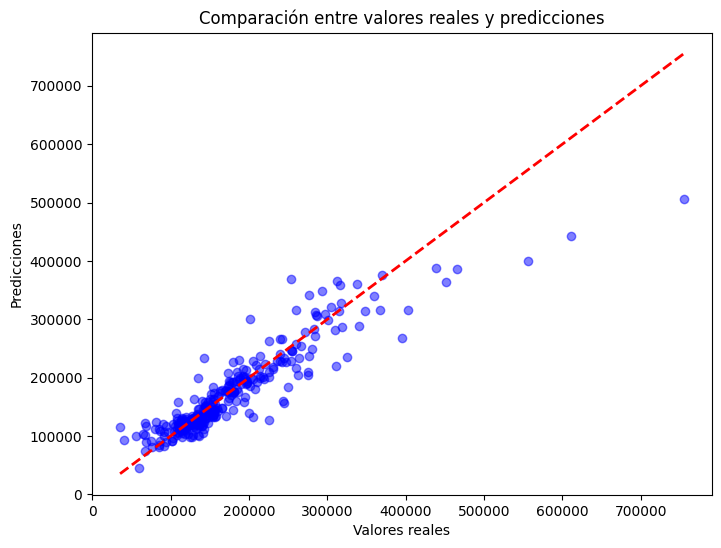

In [10]:
# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

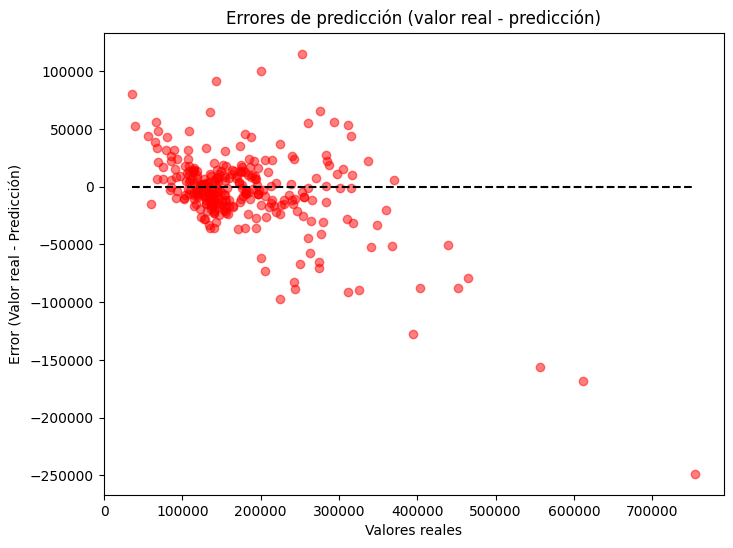

In [11]:
# Gráfico de Errores de Predicción
errores = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

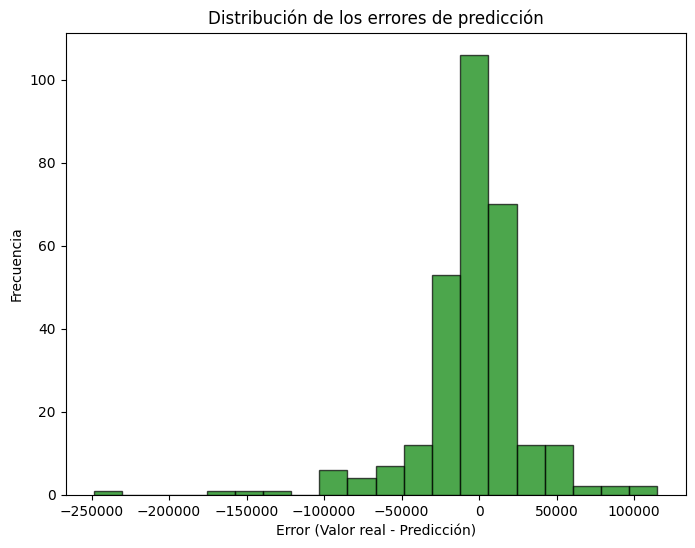

In [12]:
# Histograma de Errores de Predicción
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error (Valor real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()

**Poner la discusión y resultados aquí**

## Modelo de clasificación

In [13]:
mean_price = train['SalePrice'].mean()
std_price = train['SalePrice'].std()

low_price = mean_price - std_price
mid_price = mean_price + std_price

def categorizar_casas(precio):
    if precio <= low_price:
        return "Barata"
    elif precio <= mid_price:
        return "Normal"
    else:
        return "Cara"

train['Categoria'] = train['SalePrice'].apply(categorizar_casas)

X = train.drop(columns=["SalePrice", "Categoria"])
y_clf = train["Categoria"]

X_train, X_test, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

train['Categoria'].value_counts()

Categoria
Normal    1145
Cara       191
Barata     124
Name: count, dtype: int64

Hacemos el pipeline con los datos normalizados

In [14]:
knn_clas_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(metric='euclidean', p=3))
])

param_grid = {
    'knn__n_neighbors': range(1, 41)
}

Probamos diferentes valores de k para encontrar el que tenga mayor precisión y menor coste computacional.

In [15]:
grid_search = GridSearchCV(knn_clas_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor valor de K
best_k = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

print(f"Mejor valor de K: {best_k}")
print(f"Mejor accuracy en validación cruzada: {best_score:.4f}")

c:\Users\pablo\OneDrive - UVG\Escritorio\UVG\7mo Semestre\Mineria de datos\Modulo 1\Proyecto 2\HT6\HT6-DM\venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejor valor de K: 38
Mejor accuracy en validación cruzada: 0.0205


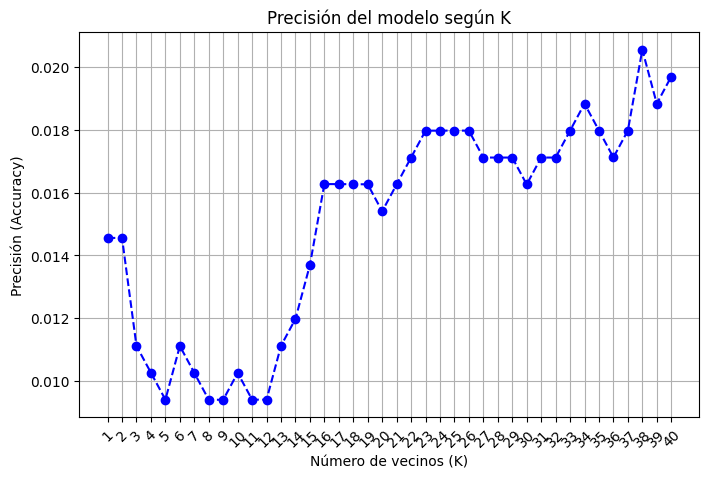

In [16]:
k_values = param_grid['knn__n_neighbors']
accuracies = grid_search.cv_results_['mean_test_score']  # Accuracy promedio por cada K

# Graficar la precisión en función de K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Precisión (Accuracy)')
plt.title('Precisión del modelo según K')
plt.xticks(k_values, rotation=45)  # Para que los valores de K se vean bien
plt.grid(True)
plt.show()

El número de K ideal es muy alto y el accuracy es muy mala, lo que nos dice que el modelo no está funcionando bien y está sorteando las casas casi de manera aleatoria. Por lo tanto haremos algunos cambios.

### Matriz de Confusión y Análisis de Errores

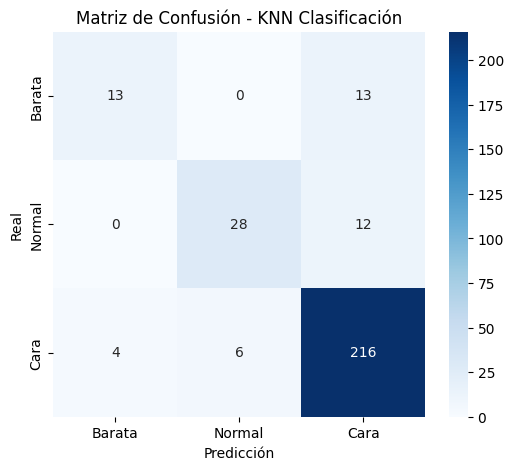

Reporte de Clasificación:
               precision    recall  f1-score   support

      Barata       0.76      0.50      0.60        26
        Cara       0.82      0.70      0.76        40
      Normal       0.90      0.96      0.93       226

    accuracy                           0.88       292
   macro avg       0.83      0.72      0.76       292
weighted avg       0.87      0.88      0.87       292



In [17]:
knn_clas_pipeline.fit(X_train, y_train_clf)

y_pred_clf = knn_clas_pipeline.predict(X_test)

conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

class_report = classification_report(y_test_clf, y_pred_clf)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Barata", "Normal", "Cara"], yticklabels=["Barata", "Normal", "Cara"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN Clasificación")
plt.show()

print("Reporte de Clasificación:\n", class_report)


ANALISIS 

### Análisis de Sobreajuste

Precisión en entrenamiento: 0.9092465753424658
Precisión en prueba: 0.8801369863013698

Precisión Promedio (Validación Cruzada): 0.8792707530904955
Desviación Estándar: 0.012024449036450632


c:\Users\pablo\OneDrive - UVG\Escritorio\UVG\7mo Semestre\Mineria de datos\Modulo 1\Proyecto 2\HT6\HT6-DM\venv\Lib\site-packages\sklearn\impute\_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(
c:\Users\pablo\OneDrive - UVG\Escritorio\UVG\7mo Semestre\Mineria de datos\Modulo 1\Proyecto 2\HT6\HT6-DM\venv\Lib\site-packages\sklearn\impute\_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


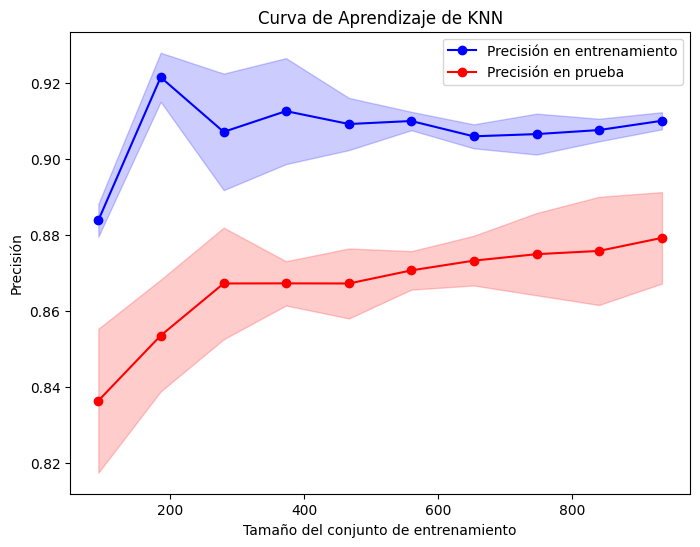

In [18]:

# Comparar precisión en entrenamiento y prueba
y_train_pred_clf = knn_clas_pipeline.predict(X_train)
y_test_pred_clf = knn_clas_pipeline.predict(X_test)

train_accuracy = accuracy_score(y_train_clf, y_train_pred_clf)
test_accuracy = accuracy_score(y_test_clf, y_test_pred_clf)

print("Precisión en entrenamiento:", train_accuracy)
print("Precisión en prueba:", test_accuracy)

# Validación cruzada 
cv_scores = cross_val_score(knn_clas_pipeline, X_train, y_train_clf, cv=5, scoring='accuracy')

cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print("\nPrecisión Promedio (Validación Cruzada):", cv_mean)
print("Desviación Estándar:", cv_std)

# Curva de Aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    knn_clas_pipeline, X_train, y_train_clf, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Precisión en entrenamiento')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Precisión en prueba')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje de KNN')
plt.legend()
plt.show()

ANALISIS

### Validación Cruzada y Comparación

In [19]:


cv_scores = cross_val_score(knn_clas_pipeline, X_train, y_train_clf, cv=5, scoring='accuracy')

cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print("Precisión Promedio (Validación Cruzada):", cv_mean)
print("Desviación Estándar:", cv_std)


Precisión Promedio (Validación Cruzada): 0.8792707530904955
Desviación Estándar: 0.012024449036450632


ANALISIS

#### Optimización de Hiperparámetros para Mejorar KNN

In [20]:
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'knn__weights': ['uniform', 'distance'],  
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'] 
}

grid_search_knn = GridSearchCV(knn_clas_pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train_clf)

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Mejores Hiperparámetros:", best_params_knn)
print("Mejor Precisión en Validación Cruzada:", best_score_knn)


Mejores Hiperparámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Mejor Precisión en Validación Cruzada: 0.8869703972708264


c:\Users\pablo\OneDrive - UVG\Escritorio\UVG\7mo Semestre\Mineria de datos\Modulo 1\Proyecto 2\HT6\HT6-DM\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.87497891 0.87583361 0.87927075 0.87841238 0.87241114 0.87241114
 0.87755768 0.87755768 0.87583361 0.87668831 0.86471516 0.86642823
 0.86299842 0.86471149        nan 0.87327317        nan 0.88098015
        nan 0.8869704         nan 0.8869704         nan 0.88353692
        nan 0.88695939        nan 0.88011078        nan 0.86729394
        nan 0.87157845        nan 0.87413521        nan 0.86899967
        nan 0.87073108        nan 0.86300576        nan 0.86214372]
  warnings.warn(


In [21]:
# Modelo KNN con los mejores hiperparámetros
best_knn_clf = KNeighborsClassifier(
    n_neighbors=best_params_knn['knn__n_neighbors'],
    weights=best_params_knn['knn__weights'],
    metric=best_params_knn['knn__metric']
)

best_knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', best_knn_clf)
])

best_knn_pipeline.fit(X_train, y_train_clf)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unavailable',
                                                                                 strategy='constant')),
                                                                  ('one-hot-encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighbo...
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF', ...])])),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=7,
                                      weights='distance'))])

### Comparación con otros Modelos (Árbol de Decisión, Random Forest, Naive Bayes)

KNN - Accuracy: 0.8699, Precision: 0.8626, Recall: 0.8699, F1-score: 0.8603, Tiempo: 0.1013 seg


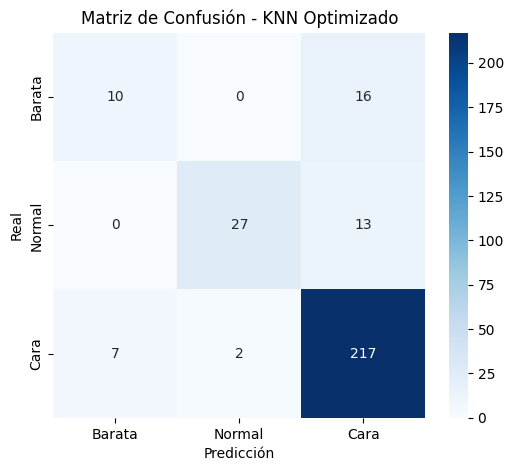

In [22]:
start_time = time.time()

y_pred_knn = best_knn_pipeline.predict(X_test)

knn_accuracy = accuracy_score(y_test_clf, y_pred_knn)
knn_precision = precision_score(y_test_clf, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test_clf, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test_clf, y_pred_knn, average='weighted')

knn_time = time.time() - start_time

conf_matrix_knn = confusion_matrix(y_test_clf, y_pred_knn)

print(f"KNN - Accuracy: {knn_accuracy:.4f}, Precision: {knn_precision:.4f}, Recall: {knn_recall:.4f}, F1-score: {knn_f1:.4f}, Tiempo: {knn_time:.4f} seg")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Barata", "Normal", "Cara"], yticklabels=["Barata", "Normal", "Cara"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN Optimizado")
plt.show()


#### Metricas de los modelos Random Forest y Naive Bayes: 
- 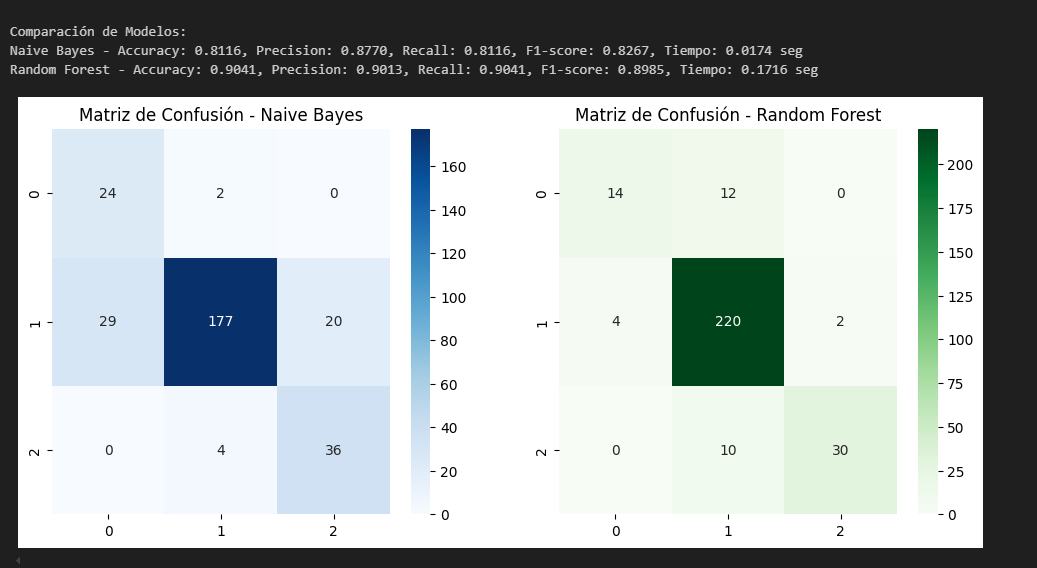

ANALISIS 